# NEVI

The NEVI project aims to rise the bar for skin cancer recognition using image processing and deep convolutional neural networks with transfer learning.

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet_v2 import EfficientNetV2S, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import ThresholdedReLU
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL


By Type

In [2]:
TYPE_DATA_FOLDER_PATH  = "grouped_images_by_type"
AKIEC_DATA_FOLDER_PATH = "grouped_images_by_type\\akiec\\*"
BCC_DATA_FOLDER_PATH   = "grouped_images_by_type\\bcc\\*"
BKL_DATA_FOLDER_PATH   = "grouped_images_by_type\\bkl\\*"
DF_DATA_FOLDER_PATH    = "grouped_images_by_type\\df\\*"
MEL_DATA_FOLDER_PATH   = "grouped_images_by_type\\mel\\*"
NV_DATA_FOLDER_PATH    = "grouped_images_by_type\\nv\\*"
VASC_DATA_FOLDER_PATH  = "grouped_images_by_type\\vasc\\*"
AKIEC_DATA_FOLDER_PATH_TEST = "secret_test_folder\\akiec\\*"
BCC_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\bcc\\*"
BKL_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\bkl\\*"
DF_DATA_FOLDER_PATH_TEST    = "secret_test_folder\\df\\*"
MEL_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\mel\\*"
NV_DATA_FOLDER_PATH_TEST    = "secret_test_folder\\nv\\*"
VASC_DATA_FOLDER_PATH_TEST  = "secret_test_folder\\vasc\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [3]:
imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH)
imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH)
imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH)
imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH)
imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH)
imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH)
imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH)

test_imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH_TEST)
test_imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH_TEST)
test_imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH_TEST)
test_imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH_TEST)
test_imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH_TEST)
test_imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH_TEST)
test_imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH_TEST)

df_AKIEC = pd.DataFrame({'filename': imgs_AKIEC})
df_AKIEC['class'] = 'AKIEC'
df_BCC = pd.DataFrame({'filename': imgs_BCC})
df_BCC['class'] = 'BCC'
df_BKL = pd.DataFrame({'filename': imgs_BKL})
df_BKL['class'] = 'BKL'
df_DF = pd.DataFrame({'filename': imgs_DF})
df_DF['class'] = 'DF'
df_MEL = pd.DataFrame({'filename': imgs_MEL})
df_MEL['class'] = 'MEL'
df_NV = pd.DataFrame({'filename': imgs_NV})
df_NV['class'] = 'NV'
df_VASC = pd.DataFrame({'filename': imgs_VASC})
df_VASC['class'] = 'VASC'

df_test_AKIEC = pd.DataFrame({'filename': test_imgs_AKIEC})
df_test_AKIEC['class'] = 'AKIEC'
df_test_BCC = pd.DataFrame({'filename': test_imgs_BCC})
df_test_BCC['class'] = 'BCC'
df_test_BKL = pd.DataFrame({'filename': test_imgs_BKL})
df_test_BKL['class'] = 'BKL'
df_test_DF = pd.DataFrame({'filename': test_imgs_DF})
df_test_DF['class'] = 'DF'
df_test_MEL = pd.DataFrame({'filename': test_imgs_MEL})
df_test_MEL['class'] = 'MEL'
df_test_NV = pd.DataFrame({'filename': test_imgs_NV})
df_test_NV['class'] = 'NV'
df_test_VASC = pd.DataFrame({'filename': test_imgs_VASC})
df_test_VASC['class'] = 'VASC'

AKIEC = 'AKIEC'
BCC = 'BCC'
BKL = 'BKL'
DF = 'DF'
MEL = 'MEL'
NV= 'NV'
VASC = 'VASC'

df_test = pd.concat([df_test_AKIEC, df_test_BCC, df_test_BKL, df_test_DF, df_test_MEL, df_test_NV, df_test_VASC])
df_temp = pd.concat([df_AKIEC, df_BCC, df_BKL, df_DF, df_MEL, df_NV, df_VASC])
df, df_val = train_test_split(df_temp, stratify=df_temp["class"], test_size=.05)

In [4]:


data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    TYPE_DATA_FOLDER_PATH,
    shuffle=False
)

Found 19329 images belonging to 7 classes.


In [5]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6,1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
flow_train = data_generator_train.flow_from_dataframe(
    df,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 18362 validated image filenames belonging to 7 classes.
Found 967 validated image filenames belonging to 7 classes.
Found 391 validated image filenames belonging to 7 classes.


In [7]:
CLASS_MAP = {class_number: class_name.split('.')[0] for class_name, class_number in flow_vis.class_indices.items()}

In [8]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [9]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(7, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [13]:
model_eff = get_model(EfficientNet)
callback = EarlyStopping(monitor='loss', patience=3)

In [21]:
model_eff = load_model("model\experimental_model_S7")

OSError: No file or directory found at model\experimental_model_S7

In [22]:
history_eff = model_eff.fit(
    flow_train,
    validation_data=flow_val,
    epochs=60,
    callbacks=[callback]
)

Epoch 1/60
919/919 [==============================] - 284s 309ms/step - loss: 0.1218 - accuracy: 0.9572 - val_loss: 0.3329 - val_accuracy: 0.8997
Epoch 2/60
919/919 [==============================] - 244s 265ms/step - loss: 0.1079 - accuracy: 0.9612 - val_loss: 0.3588 - val_accuracy: 0.8904
Epoch 3/60
919/919 [==============================] - 254s 277ms/step - loss: 0.1170 - accuracy: 0.9592 - val_loss: 0.3667 - val_accuracy: 0.8852
Epoch 4/60
919/919 [==============================] - 255s 278ms/step - loss: 0.1042 - accuracy: 0.9624 - val_loss: 0.3390 - val_accuracy: 0.8873
Epoch 5/60
919/919 [==============================] - 251s 272ms/step - loss: 0.1012 - accuracy: 0.9632 - val_loss: 0.3838 - val_accuracy: 0.8873
Epoch 6/60
919/919 [==============================] - 255s 278ms/step - loss: 0.1078 - accuracy: 0.9612 - val_loss: 0.3729 - val_accuracy: 0.8914
Epoch 7/60
919/919 [==============================] - 265s 288ms/step - loss: 0.0983 - accuracy: 0.9653 - val_loss: 0.3327 -

In [16]:
from keras import Model
Model.save(
    model_eff,
    filepath=".\\model\\experimental_model_S10.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

In [17]:
_, resnet_accuracy = model_eff.evaluate(flow_test)

20/20 [==============================] - 3s 129ms/step - loss: 0.5047 - accuracy: 0.8696


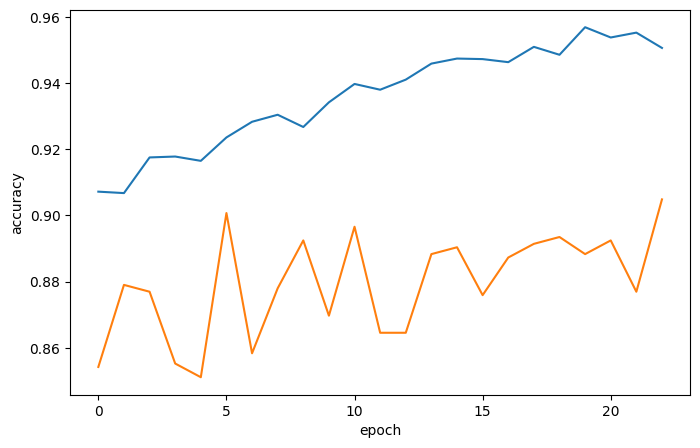

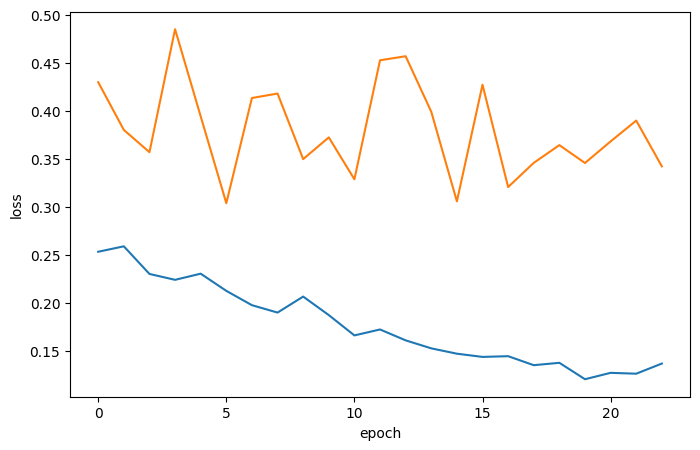

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_eff.history["accuracy"])
plt.plot(history_eff.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_eff.history["loss"])
plt.plot(history_eff.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


20/20 [==============================] - 5s 74ms/step


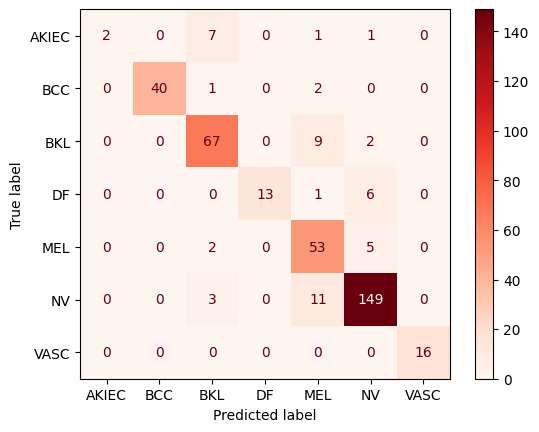

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ava_labels = [AKIEC, BCC, BKL, DF, MEL, NV, VASC]
true_labels = flow_test.classes
predictions = model_eff.predict(flow_test)
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=ava_labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [57]:
from skimage import transform
from PIL import Image
import cv2

class Predictor:
    def __init__(self, model_path: str):
        self.model = load_model(model_path)

    def predict(self, image):
        np_image = np.array(image).astype(float)
        np_image = transform.resize(np_image, (256, 256, 3))
        np_image = np.expand_dims(np_image, axis=0)
        np_image = preprocess_input(np_image)
        result = self.model.predict(np_image)[0]
        print(result)
        return self.map_results(result)

    def map_results(self, results: list):
        map_results = {
            0: "Actinic keratoses and intraepithelial carcinoma / Bowen's diesease",
            1: "You die bro",
            2: "Benign keratosis-like lesions",
            3: "Dermatofibroma",
            4: "Melanoma",
            5: "Melanocytic nevi",
            6: "Vascular lesions"
        }
        return map_results[np.argmax(results)]


if __name__ == "__main__":
    # with open(r"D:\Projects\thesis\grouped_images_by_severity\benign\ISIC_0024306.jpg", "r") as f:
    img = Image.open(r"D:\Projects\thesis\grouped_images_by_type\nv\ISIC_0034098.jpg")
    pred = Predictor(r"D:\Projects\thesis\model\experimental_model_S8")
    pred = pred.predict(img)
    print(pred)


In [ ]:
custom_model = 0

By Severity

In [ ]:
SEVERITY_DATA_FOLDER_PATH = "grouped_images_by_severity"
BENIGN_DATA_FOLDER_PATH = "grouped_images_by_severity\\benign\\*"
MALIGNANT_DATA_FOLDER_PATH = "grouped_images_by_severity\\malignant\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [ ]:
imgs_benign = glob.glob(BENIGN_DATA_FOLDER_PATH)
imgs_malignant = glob.glob(MALIGNANT_DATA_FOLDER_PATH)

df_benign = pd.DataFrame({'filename': imgs_benign})
df_benign['class'] = 'benign'
df_malignant = pd.DataFrame({'filename': imgs_malignant})
df_malignant['class'] = 'melignant'

df = pd.concat([df_benign, df_malignant])

df_train, df_temp = train_test_split(df, stratify=df['class'], test_size=.1)
df_val, df_test = train_test_split(df_temp, stratify=df_temp['class'], test_size=.5)


In [ ]:

data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    SEVERITY_DATA_FOLDER_PATH,
    shuffle=True
)

In [ ]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6, 1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
flow_train = data_generator_train.flow_from_dataframe(
    df_train,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)



In [ ]:
CLASS_MAP = {class_number: class_name.split('.')[0] for class_name, class_number in flow_vis.class_indices.items()}

In [ ]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [ ]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(2, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [ ]:
model_eff = get_model(EfficientNet)

In [ ]:
model_eff.summary()

In [ ]:
history_rsnet = model_eff.fit(
    flow_train,
    validation_data=flow_val,
    epochs=1
)

In [ ]:
_, resnet_accuracy = model_eff.evaluate(flow_test)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_rsnet.history["accuracy"])
plt.plot(history_rsnet.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_rsnet.history["loss"])
plt.plot(history_rsnet.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
from keras import Model
Model.save(
    model_eff,
    filepath=".\\model\\experimental_model_severity_full90prc_S5.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)